## 03 Starnet predictions

The stardist model is used to create instance masks for a subsequent watershed. The main drawback of stardist is that one doesn't get accurate cell borders due to the limited number of polygons (depending on computational expenses). Therefore, this model 'only' operates with 32 angles.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import skimage
import stardist.models

import utils.evaluation
import utils.model_builder
import utils.visualize

/Users/beichenberger/anaconda3/envs/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/beichenberger/anaconda3/envs/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/beichenberger/anaconda3/envs/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/beichenberger/anac

### Import images

For testing, the BBBC006v1 image set from the Broad Bioimage Benchmark Collection was used [Ljosa et al., Nature Methods, 2012].

In [2]:
root = '/Users/beichenberger/Downloads/Labeling/Nuclei_dapi/BBBC006'

X = sorted(glob.glob(f'{root}/images/*.tif'))
Y = sorted(glob.glob(f'{root}/masks/*.png'))

X = list(map(skimage.io.imread, X))
Y = list(map(skimage.io.imread, Y))

/Users/beichenberger/anaconda3/envs/image/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2616: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/Users/beichenberger/anaconda3/envs/image/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2551: UserWarning: unpack: buffer size must be a multiple of element size
  warnings.warn("unpack: %s" % e)


### Import models

In [3]:
# UNet
model_unet = utils.model_builder.standard_unet(img_size=None)
model_unet.load_weights('./models/20191031_UNet5.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# Stardist
model_star = stardist.models.StarDist2D(None, name='Stardist', basedir='./models/')






Loading network weights from 'weights_best.h5'.


Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


### Otsu

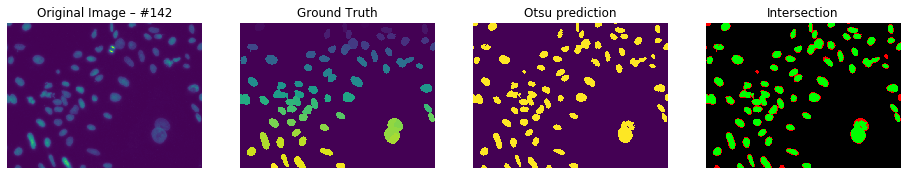

In [5]:
utils.visualize.otsu_example(X, Y)

Average IoU: 0.6353888721955127
Stdev IoU: 0.10047387821413016


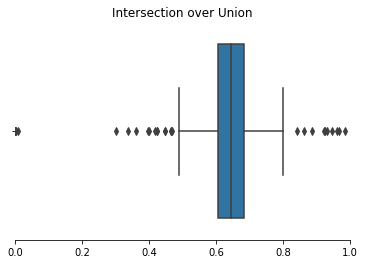

In [6]:
preds_otsu = utils.predictions.otsu_batch(X)
utils.evaluation.measure_iou(Y, preds_otsu, 'otsu')

### UNet

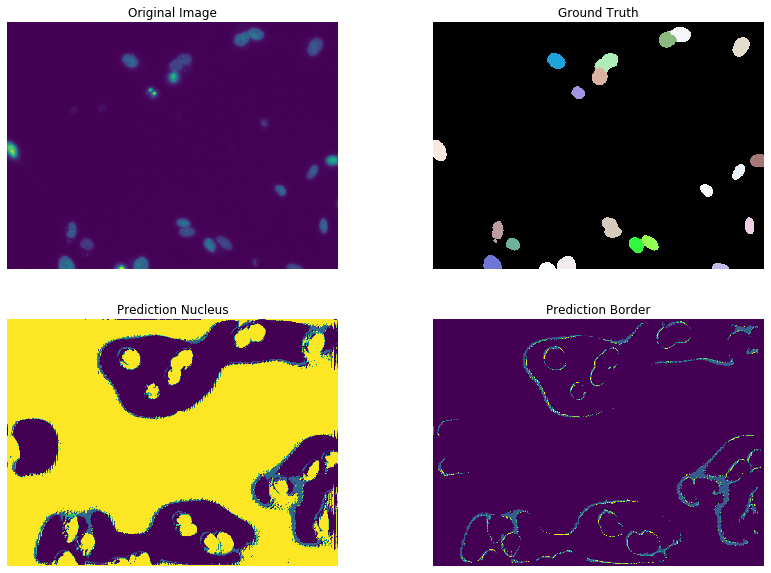

In [7]:
utils.visualize.unet_example(model_unet, X, Y)

In [ ]:
preds_unet = utils.predictions.unet_batch(model_unet, X)
# TODO – find optimal prediction parameters
# preds_unet_meas = [1-p[:,:,0] for p in preds_unet]
utils.evaluation.measure_iou(Y, preds_unet_meas, 'unet')

### Stardist

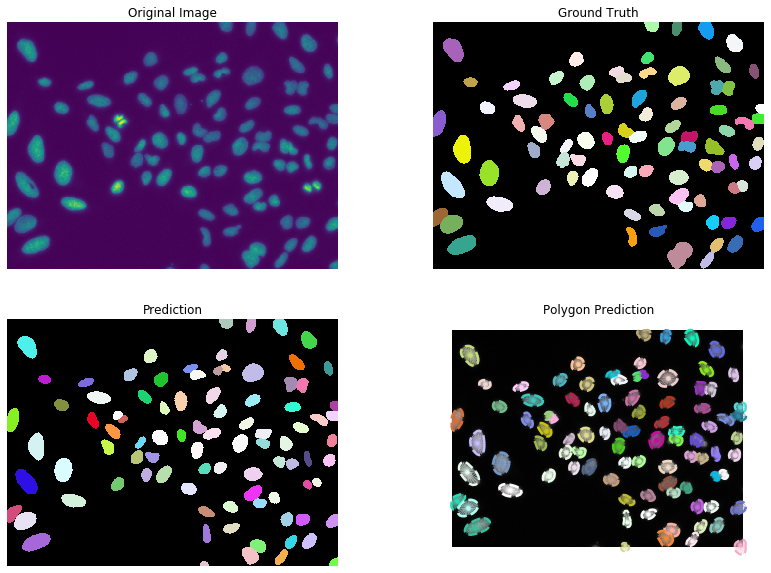

In [8]:
utils.visualize.stardist_example(model_star, X, Y)

In [ ]:
preds_star = utils.predictions.stardist_batch(model_star, X)
utils.evaluation.measure_iou(Y, preds_star, 'stardist', prob=0)

### Starnet

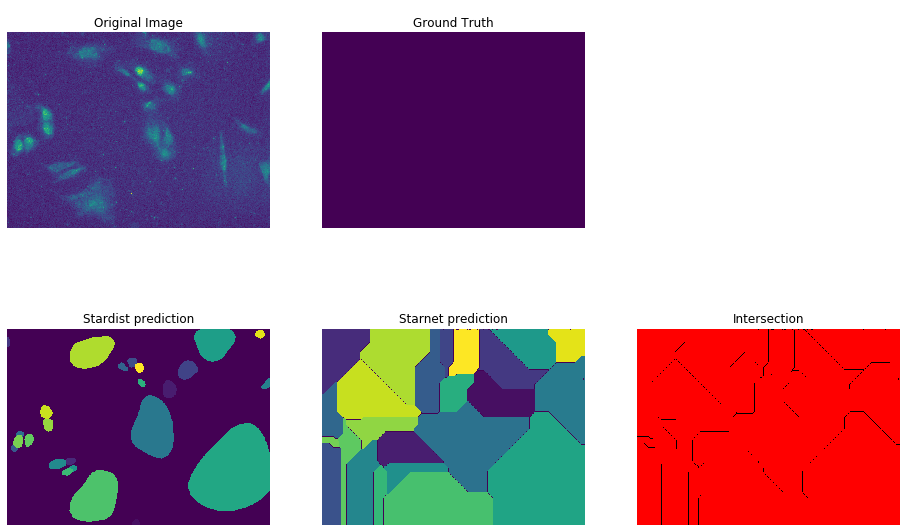

In [9]:
utils.visualize.starnet_example(model_star, model_unet, X, Y)

In [ ]:
preds_starnet = utils.predictions.starnet_batch()
utils.evaluation.measure_iou(Y, preds_star, 'starnet', prob=0)